# Differential cross section

In [1]:
%matplotlib inline

In [31]:
# %load preamb.py
import numpy as np
import pylab as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.constants as co
import uncertainties as uc
import uncertainties.unumpy as un
from scipy.signal import argrelextrema as ext
from scipy.signal import savgol_filter as sav
import seaborn as sns
from scipy.special import erfc
from scipy.integrate import quad
import sys

sns.set(style='ticks', palette='Set2')
sns.despine()

fontsize_labels = 22    # size used in latex document
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['figure.figsize'] = (2*6.2, 2*3.83)  # in inches; width corresponds to \textwidth in latex document (golden ratio)

plt.close("all")
show_fig = True
save_fig = False # see below
if not save_fig:
        rcParams['figure.figsize'] = (13, 8)
        fig_dir = "../figures/"
        
        
npy_dir = "./data_npy/"
data_dir = "./data/"        

## Integration

Photon intensities at different angles. 
Integration is done numerically: sum over entries of histogram, 
multiplied by width of bin in energy domain (result of calibration_na). 
The differential cross section is approximated by the fraction of 
photons scattered at angle $\theta$ ($I(\theta)$) over the total incident 
intensity ($I_{tot}$), divided by the solid angle $\Delta \Omega$.

In [25]:
dE = na_cal[0] * 16
i_photon = dE * np.load(npy_dir + 'i_photon_' + str(theta) + '.npy')

"""
# Calculate integral directly
sums = []
theta = 75
y = np.load(npy_dir + 'na_rate_' + str(theta) + '.npy')
sums.append(np.sum(y))
na_cal = np.load(npy_dir + 'na_calibration.npy')
integral = np.array(sums) * dE
"""

# no_total_incident

'epsilon(energy)'
'mu(energy)'

'mu(energy)'

In [36]:
def plot_total():
    '''
    Plots total incident photons at NaI scintillator
    (source: 137Cs, no target in between)
    '''
    #### GET DATA  ####
    file_name = "na_total_incident"
    file_in = npy_dir + file_name + '.npy'
    y = np.load(file_in)
    y_e = un.uarray(y, np.maximum(1, np.sqrt(y)))
    
    ### Get time from file
    file_in_mcd = data_dir + file_name + '.TKA'
    f = open(file_in_mcd)
    settings = f.read()
    f.close()
    lines = settings.split('\n')
    t = np.float(lines[1]) # livetime is written in line 1...

    rate = y / t
    #rate = rate - rate_bg
    #rate = rate - rate_rnd
    rate[rate < 0] = 0
    y = rate    # Continue to work with the rate!

    rate_e = y_e / t # - rate_bg_e - rate_rnd_e
    rate_e[rate < 0] = 0 


    # Rebinning: 1/16 of number of bins
    z = y[:-14] # last 14 bins are dropped to obtain a len(z) as a multiple of 16
    z = z.reshape([len(z) / 16, 16])
    z = np.sum(z, axis=1)
    y = z

    z_e = rate_e[:-14] # last 14 bins are dropped to obtain a len(z) as a multiple of 16
    z_e = z_e.reshape([len(z_e) / 16, 16])
    z_e = np.sum(z_e, axis=1)
    y_e = z_e
    np.save(npy_dir + 'na_rate_' + str(theta), y_e)

    x = np.arange(len(y))
    y_filtered = sav(y, 201, 7)

    ###### PLOTTING #################
    if show_fig:
        fig1, ax1 = plt.subplots(1, 1)
        if not save_fig:
            fig1.suptitle("NaI scintillator, total incident photons")
        ax1.plot(x, y, '.', alpha=0.9, label='data')
        ax1.set_xlabel("Channel")
        ax1.set_ylabel("Rate / $s^{-1}$")
        ax1.set_xlim(0, 800)
        ax1.set_ylim(0,)
        ax1.legend(loc=1)
        ax1.grid(True)
        if save_fig:
            fig1.savefig(fig_dir + file_name + ".pdf")
            fig1.savefig(fig_dir + file_name + ".png")

    return(0)


0

/usr/lib/python3/dist-packages/matplotlib/figure.py:1596: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


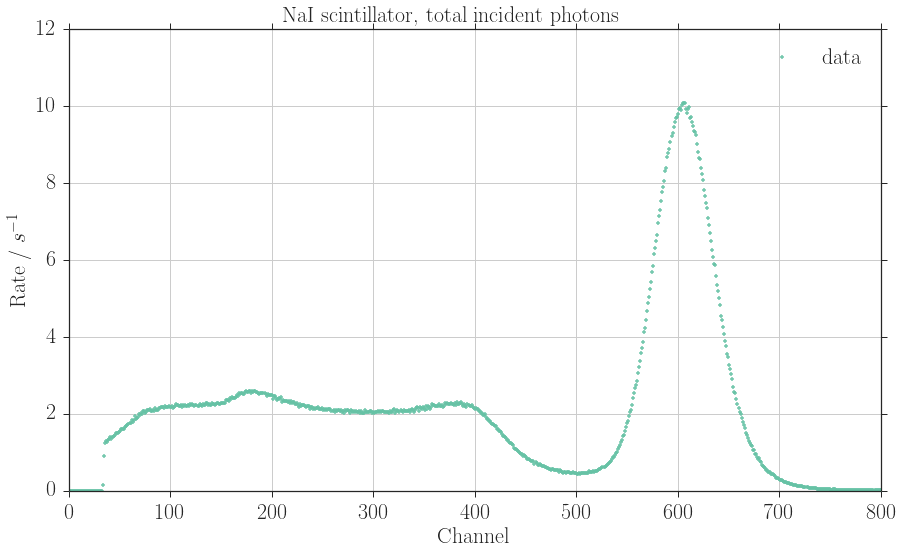

In [37]:
plot_total()

must further include: errors on counts for all measurements